In [1]:
import numpy as np
import camb
import matplotlib.pyplot as plt
from Powerspec import *

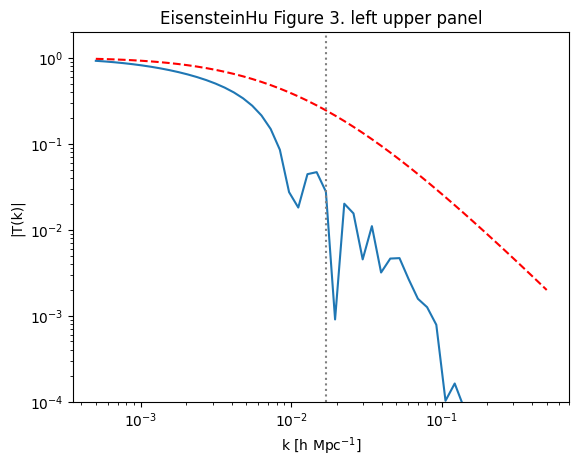

In [2]:
om0h2 = 0.2*0.5**2
ombh2 = om0h2*1
pars = EisensteinHu(ombh2=ombh2, omch2=om0h2-ombh2, h=0.5)
karr = np.logspace(-3,0,50)
p= np.abs(pars.Transfer_function(karr))
loc = pars.first_peak()
q = pars.Transfer_function_zero_baryon(karr)
plt.plot(karr*0.5, p)
plt.plot(karr*0.5, q, linestyle='--', color='red')
plt.axvline(loc*0.5, linestyle=':', color='gray')
plt.ylim(1e-4,2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k [h Mpc$^{-1}$]')
plt.ylabel('|T(k)|')
plt.title('EisensteinHu Figure 3. left upper panel')
plt.savefig('./figs/EH_figure3_left_upper.png', dpi=300)
plt.show()

In [3]:
om0h2 = 0.13348568
ombh2 = 0.02258368
omch2 = om0h2 - ombh2
pars2 =  EisensteinHu(ombh2=ombh2, omch2=omch2, h=0.71, TCMB=2.725)
print(pars2.zdrag)

1020.3206045824348


In [4]:
from camb import model

In [5]:
"""
karr = np.logspace(-3,0,50)
kharr = karr*pars2.h
pars_CAMB = camb.CAMBparams()
hubble = pars2.h * 100
pars_CAMB.set_cosmology(H0=hubble, ombh2=ombh2, omch2=omch2, TCMB = 2.725)
pars_CAMB.set_dark_energy() #re-set defaults
pars_CAMB.InitPower.set_params(As=pars2.As,ns=pars2.ns)
pars_CAMB.set_matter_power(redshifts=[0.], kmax=2.0)
results_CAMB = camb.get_results(pars_CAMB)
transfer = results_CAMB.get_matter_transfer_data()
kh = transfer.transfer_data[0, :, 0]
delta = transfer.transfer_data[model.Transfer_kh, :, 0]
"""

'\nkarr = np.logspace(-3,0,50)\nkharr = karr*pars2.h\npars_CAMB = camb.CAMBparams()\nhubble = pars2.h * 100\npars_CAMB.set_cosmology(H0=hubble, ombh2=ombh2, omch2=omch2, TCMB = 2.725)\npars_CAMB.set_dark_energy() #re-set defaults\npars_CAMB.InitPower.set_params(As=pars2.As,ns=pars2.ns)\npars_CAMB.set_matter_power(redshifts=[0.], kmax=2.0)\nresults_CAMB = camb.get_results(pars_CAMB)\ntransfer = results_CAMB.get_matter_transfer_data()\nkh = transfer.transfer_data[0, :, 0]\ndelta = transfer.transfer_data[model.Transfer_kh, :, 0]\n'

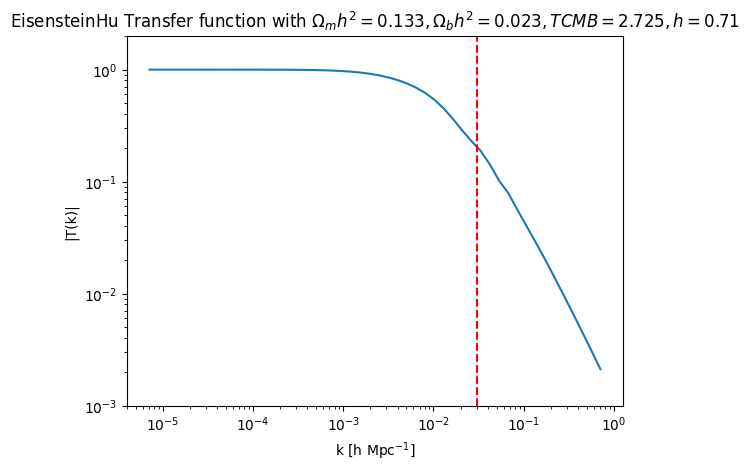

In [6]:

karr = np.logspace(-5,0,50)
p= pars2.Transfer_function(karr)
loc = pars2.first_peak()
plt.plot(karr*pars2.h, p, label = 'EisensteinHu')
#plt.plot(karr*pars2.h, q, linestyle='--', color='red')
plt.axvline(loc*pars2.h, color='r', linestyle='--', label=f'First Peak at k={loc:.3f} kMpc$^{{-1}}$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-3,2)
plt.xlabel('k [h Mpc$^{-1}$]')
plt.ylabel('|T(k)|')
plt.title(rf'EisensteinHu Transfer function with $\Omega_mh^2 = {pars2.om0h2:.3f}, \Omega_bh^2 = {pars2.ombh2:.3f}, TCMB = {pars2.TCMB:.3f}, h = {pars2.h:.2f}$')
plt.savefig('./figs/EH_Transfer_CAMB_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

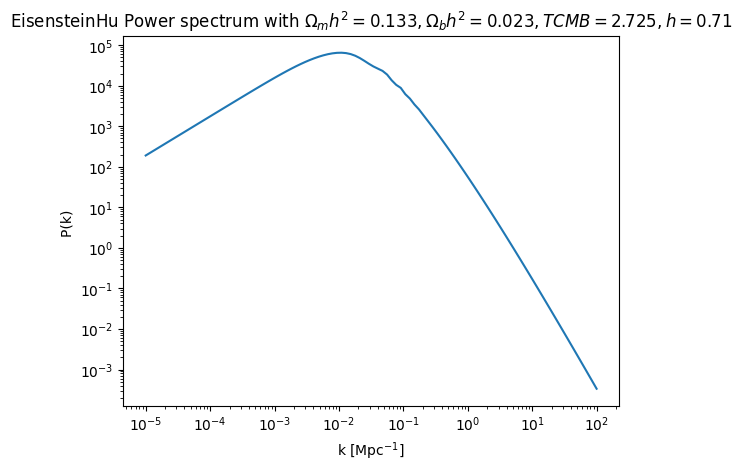

In [7]:
karr2 = np.logspace(-5,2,100)
ps = pars2.Power_spectrum_0(karr2)
plt.loglog(karr2, ps)
plt.xlabel('k [Mpc$^{-1}$]')
plt.ylabel('P(k) ')
plt.title(rf'EisensteinHu Power spectrum with $\Omega_mh^2 = {pars2.om0h2:.3f}, \Omega_bh^2 = {pars2.ombh2:.3f}, TCMB = {pars2.TCMB:.3f}, h = {pars2.h:.2f}$')
plt.savefig('./figs/EH_Power_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

/Users/john0712/KASI_Ms/2025/Field_research_2/Powerspec.py:181: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  D1 = 5/2 * self.om0 * H0**2 * Hubble * spi.quad(lambda a: 1/(a*Hubble)**3,0,a)[0] # [6.10]


Rescaling power spectrum... sigma8 = 0.002069514345807847


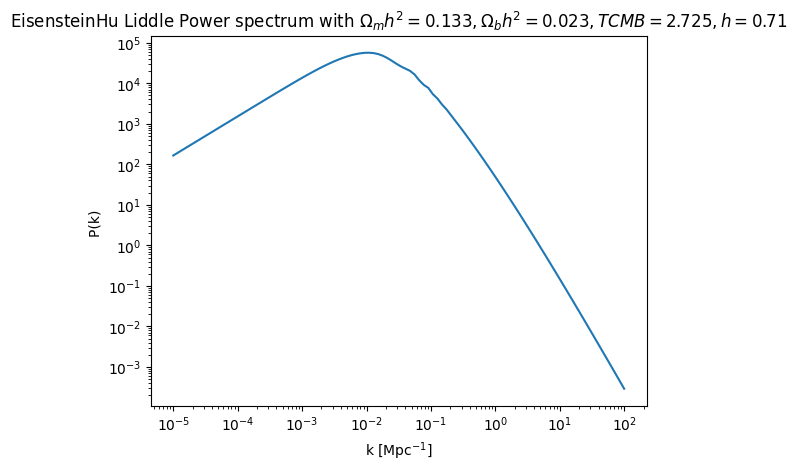

In [8]:
psliddle = pars2.Power_spectrum_liddle(1, karr2, rescale=True)
plt.loglog(karr2, psliddle)
plt.xlabel('k [Mpc$^{-1}$]')
plt.ylabel('P(k) ')
plt.title(rf'EisensteinHu Liddle Power spectrum with $\Omega_mh^2 = {pars2.om0h2:.3f}, \Omega_bh^2 = {pars2.ombh2:.3f}, TCMB = {pars2.TCMB:.3f}, h = {pars2.h:.2f}$')
plt.savefig('./figs/EH_Power_spectrum_liddle.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
om0 = 0.3
D1 = 5/2 * (1/70 + 209*om0/140 - om0**2/140 + om0**(4/7))**-1 
D1

2.593124183958944